In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp -r /content/drive/My\ Drive/eva-4/Phase-2/Session-4/* ./

In [ ]:
!nvidia-smi

Sun Aug 23 06:08:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install torch==1.5.1+cu92 torchvision==0.6.1+cu92 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 604.8MB 29kB/s 
     |████████████████████████████████| 6.5MB 28.0MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
import torch
from IPython.display import Image, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu92 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=3c62cbdad7d532bb896517a4234622ad1597d84e991eb219f65a7e1c1993ffdf
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
from zipfile import ZipFile

def extract_images(zipfilename, targetfolder):
  
  zipObj = ZipFile(zipfilename, 'r')
  #print("zipObj " +zipObj)
  zipObj.extractall(targetfolder)
  zipObj.close()

time: 2.62 ms


In [ ]:
extract_images('/content/aligned.zip','/content')

time: 931 ms


In [ ]:
!cp -r /content/drive/My\ Drive/eva-4/Phase-2/Session-4/* ./

In [ ]:
!find /content/dataset/train -name '.DS_Store' -type f -delete
!find /content/dataset/val -name '.DS_Store' -type f -delete

In [ ]:
from torch import nn, optim, as_tensor
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.nn.init import *
from torchvision import transforms, utils, datasets, models
import cv2
from PIL import Image
from pdb import set_trace
import time
import copy
from pathlib import Path
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from skimage import io, transform
from tqdm import trange, tqdm
import csv
import glob
import dlib
import pandas as pd
import numpy as np
from models.inception_resnet_v1 import InceptionResnetV1
import faceBlendCommon as fbc

time: 2.14 s


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

time: 3.95 ms


In [ ]:
def align_image():
    data_dir = '/content/dataset/'
    for train_test in ['train','val']:
        train_test_path=os.path.join(data_dir,train_test)
        for person_folder in os.listdir(train_test_path):
            folder_path=os.path.join(train_test_path,person_folder)
            for each_file in os.listdir(folder_path):
                align_and_save(os.path.join(folder_path,each_file))

In [ ]:
def align_and_save(file):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    print(file)
    im=cv2.imread(file)
    faceRects=detector(im,0)
    
    points = fbc.getLandmarks(detector, predictor, im)
    points=np.array(points)
    im = np.float32(im)/255.0
    
    h=600
    w=600
    imNorm, points = fbc.normalizeImagesAndLandmarks((h,w), im, points)
    imNorm = np.uint8(imNorm*255)
    cv2.imwrite(file,imNorm)

In [ ]:
align_image()

In [ ]:
# !zip -r /content/aligned.zip /content/dataset

  adding: content/dataset/ (stored 0%)
  adding: content/dataset/.DS_Store (deflated 95%)
  adding: content/dataset/val/ (stored 0%)
  adding: content/dataset/val/vijaydevarakonda/ (stored 0%)
  adding: content/dataset/val/vijaydevarakonda/Vijay-Devarakonda-Bigg-Boss-Host-1.jpg (deflated 2%)
  adding: content/dataset/val/vijaydevarakonda/Vijay-Devarakonda-Latest-Photos-04JPG.jpg (deflated 0%)
  adding: content/dataset/val/vijaydevarakonda/Vijay-Devarakonda-comes-up-with-MCF.jpg (deflated 0%)
  adding: content/dataset/val/vijaydevarakonda/vijaydevara11022020_108.jpg (deflated 0%)
  adding: content/dataset/val/vijaydevarakonda/Vijay20Devarakonda201200.jpg (deflated 0%)
  adding: content/dataset/val/vijaydevarakonda/Vijay-Devarakonda-Latest-Photos-05JPG.jpg (deflated 0%)
  adding: content/dataset/val/vijaydevarakonda/vijaydevara11022020_006.jpg (deflated 0%)
  adding: content/dataset/val/vijaydevarakonda/vijay-main-picture.jpg (deflated 0%)
  adding: content/dataset/val/vijaydevarakonda/V

In [ ]:
# !mv /content/aligned.zip /content/drive/My\ Drive/eva-4/Phase-2/Session-4/

time: 2.17 s


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((160,160)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((160,160)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = '/content/content/dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=10, 
                                             shuffle=True)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}
class_names = image_datasets['train'].classes
class_names

['alluarjun',
 'dharamtej',
 'maheshbabu',
 'modi',
 'nani',
 'ntr',
 'prabhas',
 'ram',
 'ramcharan',
 'vijaydevarakonda']

time: 19.6 ms


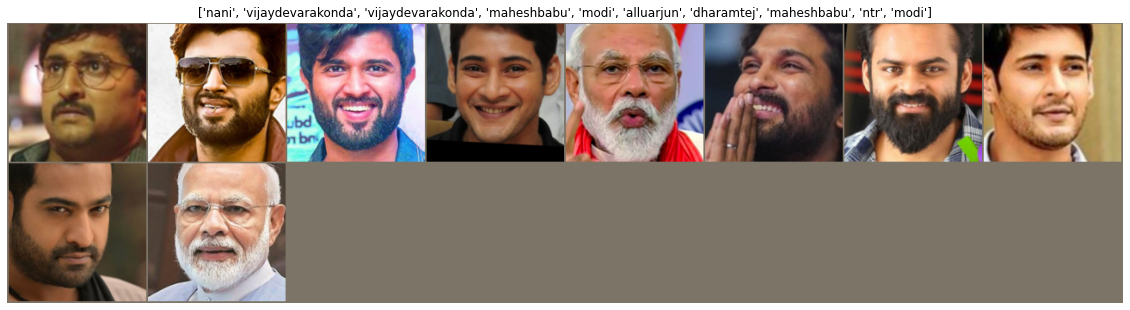

time: 528 ms


In [ ]:
from torchvision import transforms, utils, datasets, models
import torchvision
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

plt.figure(figsize=(20, 10))
plt.axis('off')
imshow(out, title=[class_names[x] for x in classes])
plt.show()

In [ ]:
from models.inception_resnet_v1 import InceptionResnetV1
print('Running on device: {}'.format(device))
model_ft = InceptionResnetV1(pretrained='vggface2', classify=False, num_classes = len(class_names))

Running on device: cuda



time: 4.13 s


In [ ]:
list(model_ft.children())[-6:]

[Block8(
   (branch0): BasicConv2d(
     (conv): Conv2d(1792, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU()
   )
   (branch1): Sequential(
     (0): BasicConv2d(
       (conv): Conv2d(1792, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU()
     )
     (1): BasicConv2d(
       (conv): Conv2d(192, 192, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1), bias=False)
       (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU()
     )
     (2): BasicConv2d(
       (conv): Conv2d(192, 192, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0), bias=False)
       (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU()
     )
   )
   (conv2d): Conv2d(384, 1792,

time: 3.68 ms


In [ ]:
layer_list = list(model_ft.children())[-5:] # all final layers
layer_list

[AdaptiveAvgPool2d(output_size=1),
 Dropout(p=0.6, inplace=False),
 Linear(in_features=1792, out_features=512, bias=False),
 BatchNorm1d(512, eps=0.001, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=512, out_features=8631, bias=True)]

time: 3.21 ms


In [ ]:
model_ft = nn.Sequential(*list(model_ft.children())[:-5])


time: 1.5 ms


In [ ]:
for param in model_ft.parameters():
    param.requires_grad = False

time: 2.26 ms


In [ ]:
class Flatten(nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return x
class normalize(nn.Module):
    def __init__(self):
        super(normalize, self).__init__()
        
    def forward(self, x):
        x = F.normalize(x, p=2, dim=1)
        return x

time: 5.34 ms


In [ ]:
# model_ft.avgpool_1a = nn.AdaptiveAvgPool2d(1)
# model_ft.dropout = nn.Dropout(p=0.6)
# model_ft.last_linear = nn.Linear(1792, 512, bias=False)
# model_ft.last_bn = nn.BatchNorm1d(512, eps=0.001, momentum=0.1, affine=True)
# model_ft.logits = nn.Linear(512, len(class_names))
# model_ft = model_ft.to(device)

time: 2.22 s


In [ ]:
# criterion = nn.CrossEntropyLoss()
# # Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model_ft.parameters(), lr=1e-2, momentum=0.9)
# # Decay LR by a factor of *gamma* every *step_size* epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

time: 4.35 ms


In [ ]:
# def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
#     since = time.time()
#     FT_losses = []
#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0
#     for epoch in range(num_epochs):
#         if epoch % 20 == 0 or epoch == (num_epochs-1):
#             print('Epoch {}/{}'.format(epoch, num_epochs - 1))
#             print('-' * 10)
#         # Each epoch has a training and validation phase
#         for phase in ['train', 'val']:
#             if phase == 'train':
#                 model.train()  # Set model to training mode
#             else:
#                 model.eval()   # Set model to evaluate mode
#             running_loss = 0.0
#             running_corrects = 0
#             # Iterate over data.
#             for inputs, labels in dataloaders[phase]:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)
#                 # zero the parameter gradients
#                 optimizer.zero_grad()
#                 # forward
#                 # track history if only in train
#                 with torch.set_grad_enabled(phase == 'train'):
#                     outputs = model(inputs)
#                     _, preds = torch.max(outputs, 1)
#                     loss = criterion(outputs, labels)
#                     # backward + optimize only if in training phase
#                     if phase == 'train':
#                         loss.backward()
#                         optimizer.step()
#                         scheduler.step()
                
#                 FT_losses.append(loss.item())
#                 # statistics
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)
#             epoch_loss = running_loss / dataset_sizes[phase]
#             epoch_acc = running_corrects.double() / dataset_sizes[phase]
#             if epoch % 20 == 0 or epoch == (num_epochs-1):
#                 print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
#             # deep copy the model
#             if phase == 'val' and epoch_acc > best_acc:
#                 best_acc = epoch_acc
#                 best_model_wts = copy.deepcopy(model.state_dict())
#     time_elapsed = time.time() - since
#     print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
#     print('Best val Acc: {:4f}'.format(best_acc))
#     # load best model weights
#     model.load_state_dict(best_model_wts)
#     return model, FT_losses

time: 44.7 ms


In [ ]:
# model_ft, FT_losses = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=200)

Epoch 0/199
----------
train Loss: 6.2362 Acc: 0.0000
val Loss: 6.2308 Acc: 0.0227


KeyboardInterrupt: ignored

time: 7min 13s


In [ ]:
# plt.figure(figsize=(10,5))
# plt.title("FRT Loss During Training")
# plt.plot(FT_losses, label="FT loss")
# plt.xlabel("iterations")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

In [ ]:
model_ft.avgpool_1a = nn.AdaptiveAvgPool2d(output_size=1)
model_ft.last_linear = nn.Sequential(
    Flatten(),
    nn.Linear(in_features=1792, out_features=512, bias=False),
    normalize()
)
model_ft.logits = nn.Linear(layer_list[3].num_features, len(class_names))
model_ft.softmax = nn.Softmax(dim=1)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=1e-2, momentum=0.9)
# Decay LR by a factor of *gamma* every *step_size* epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

time: 3.68 s


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    FT_losses = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        if epoch % 20 == 0 or epoch == (num_epochs-1):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        scheduler.step()
                
                FT_losses.append(loss.item())
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            if epoch % 20 == 0 or epoch == (num_epochs-1):
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, FT_losses

time: 33.1 ms


Epoch 0/499
----------
train Loss: 2.3016 Acc: 0.1802
val Loss: 2.3011 Acc: 0.2273
Epoch 20/499
----------
train Loss: 2.3014 Acc: 0.1837
val Loss: 2.3011 Acc: 0.2273
Epoch 40/499
----------
train Loss: 2.3014 Acc: 0.1767
val Loss: 2.3012 Acc: 0.1989
Epoch 60/499
----------
train Loss: 2.3014 Acc: 0.2085
val Loss: 2.3011 Acc: 0.1989
Epoch 80/499
----------
train Loss: 2.3013 Acc: 0.1837
val Loss: 2.3011 Acc: 0.2216
Epoch 100/499
----------
train Loss: 2.3013 Acc: 0.1908
val Loss: 2.3011 Acc: 0.2273
Epoch 120/499
----------
train Loss: 2.3014 Acc: 0.1943
val Loss: 2.3011 Acc: 0.2443
Epoch 140/499
----------
train Loss: 2.3014 Acc: 0.1802
val Loss: 2.3011 Acc: 0.1989
Epoch 160/499
----------
train Loss: 2.3013 Acc: 0.1873
val Loss: 2.3011 Acc: 0.2216
Epoch 180/499
----------
train Loss: 2.3014 Acc: 0.1837
val Loss: 2.3011 Acc: 0.2102
Epoch 200/499
----------
train Loss: 2.3012 Acc: 0.2014
val Loss: 2.3011 Acc: 0.1989
Epoch 220/499
----------
train Loss: 2.3014 Acc: 0.1555
val Loss: 2.301

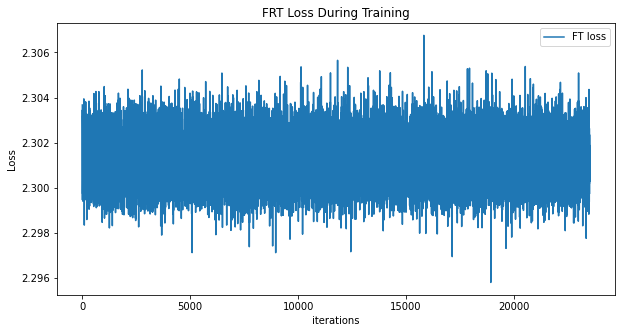

time: 43min 17s


In [ ]:
model_ft, FT_losses = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=500)
plt.figure(figsize=(10,5))
plt.title("FRT Loss During Training")
plt.plot(FT_losses, label="FT loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
torch.save(model_ft, '/content/drive/My Drive/eva-4/Phase-2/Session-4/models/model_save.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Flatten. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type normalize. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


time: 478 ms


In [ ]:
traced_model = torch.jit.trace(model_ft.to('cpu'), torch.randn(1, 3, 160, 160))


time: 2.38 s


In [ ]:
traced_model.save('/content/drive/My Drive/eva-4/Phase-2/Session-4/models/model_traced.pt')


time: 957 ms
